# Riddler Express 12/7/18

## Problem
Louie walks to and from work every day. In his city, there is a 50 percent chance of rain each morning and an independent 40 percent chance each evening. His habit is to bring (and use) an umbrella if it’s raining when he leaves the house or office, but to leave them all behind if not. Louie owns three umbrellas.

On Sunday night, two are with him at home and one is at his office. Assuming it never starts raining during his walk to his home or office, what is the probability that he makes it through the work week without getting wet?

(https://fivethirtyeight.com/features/the-little-mathematically-determined-house-on-the-prairie/)


## Solution
This situation can be modeled with a Markov chain. Since we're only concerned with whether or not Louie gets wet (and not *how many times he gets wet*), let's consider a system with nine states (numbered 0 through 8):

    state 0: Louie at HOME (3 umbrellas at home, 0 at work)
    state 1: Louie at HOME (2 umbrellas at home, 1 at work)
    state 2: Louie at HOME (1 umbrellas at home, 2 at work)
    state 3: Louie at HOME (0 umbrellas at home, 3 at work)

    state 4: Louie at WORK (3 umbrellas at home, 0 at work)
    state 5: Louie at WORK (2 umbrellas at home, 1 at work)
    state 6: Louie at WORK (1 umbrellas at home, 2 at work)
    state 7: Louie at WORK (0 umbrellas at home, 3 at work)

    state 8: Louie gets WET
    
This system transitions to a new state each time Louis goes from home to work or vice versa.

Consider state 1, where Louie is at home with two of his umbrellas. If it's raining when Louie leaves for work, he'll bring an umbrella with him from home to work. If it's not raining, he won't. In other words, state 1 has a 50% chance of transitioning to state 6, a 50% chance of transitioning to state 5, and a 0% chance of transitioning to any other state.

Suppose the system is in state 1 and it doesn't rain when Louie goes to work. The system would transition to state 5 (i.e., Louie is at work and he'd have one umbrella there with him.) Then if it's raining when Louie returns home, he'll bring an umbrella with him and the system moves to state 0; if it's not raining, the umbrellas stay put and the system moves back to state 1. In other words, state 5 has a 40% chance of transitioning to state 0, a 60% chance of transitioning to state 1, and a 0% chance of transitioning to any other state. Etc.

We can represent all these transition probabilities with a matrix, *M*, where the element in the *i*-th row and the *j*-th column is the probability of moving from state *i* to state *j* after one transition:

In [1]:
import numpy as np

M = np.array([
    [0., 0., 0., 0., .5, .5, 0., 0., 0.],
    [0., 0., 0., 0., 0., .5, .5, 0., 0.],
    [0., 0., 0., 0., 0., 0., .5, .5, 0.],
    [0., 0., 0., 0., 0., 0., 0., .5, .5],
    [.6, 0., 0., 0., 0., 0., 0., 0., .4],
    [.4, .6, 0., 0., 0., 0., 0., 0., 0.],
    [0., .4, .6, 0., 0., 0., 0., 0., 0.],
    [0., 0., .4, .6, 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 1.],
])

Note that if the system transitions to state 8 (the state that indicates that Louie has gotten wet) it stays there. State 8 has a 100% chance of transitioning to state 8, and 0% chance of transitioning to any other state.

Ok. The matrix above lets us look up the probability of moving from state *i* to state *j* after one transition. Thanks to **math**, we can compute the probability of moving from state *i* to state *j* after *n* transitions by simply raising *M* to the *n*-th power.

Since Louie has 10 trips between home and work over the course of one work week, let's raise *M* to the 10th power and look at row 1, column 8:

In [2]:
np.linalg.matrix_power(M, 10)[1, 8]

0.30730000000000002

So the probability that Louie gets wet during the week if he starts with two umbrellas at home and one at work is **30.73%**. This means that the probability he doesn't get wet over the course of one work week is **69.27%**.

In [3]:
1 - 0.3073

0.6927

Over time, it's inevitable that Louie gets wet. The graph below shows the probability of Louie staying dry as a function of time.

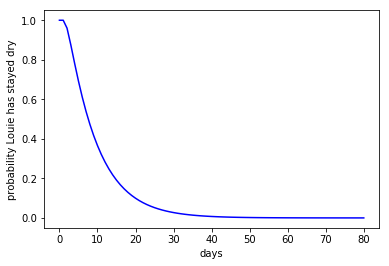

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pr = []
for d in range(81):
    pr.append(1 - np.linalg.matrix_power(M, 2*d)[1, 8])
    
plt.plot(range(81), pr, 'b')
plt.xlabel("days")
plt.ylabel("probability Louie has stayed dry")